ALUNO: PEDRO NÍCOLLAS PEREIRA LEON LOPES

### 4. Classificação com Árvores de Decisão
Implemente uma árvore de decisão para classificar o conjunto de dados Titanic.

Use a métrica ROC-AUC para avaliar a performance do modelo.

In [51]:
# DATASET UTILIZADO -> Titanic (data/titanic.csv)

In [52]:
# Conjunto de Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score            # ROC curve e accuracy

In [53]:
dados = pd.read_csv("data/titanic.csv")            # lendo o .csv

In [54]:
dados.head()            # vendo o cabeçalho do .csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


TRATAMENTO DOS DADOS

In [55]:
# Checagem de valores nulos
dados.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
# Remoção de nulos
dados = dados.dropna(subset=['Age'])
dados = dados.dropna(subset=['Fare'])

In [57]:
# Transformando a coluna ['SEX'] em numéricos
dados['Sex'] = dados['Sex'].replace({'female': 0, 'male': 1}).infer_objects()

DROPANDO COLUNAS INÚTEIS PARA O ESTUDO ("PassengerId", "Name", "Ticket", "Cabin" e "Embarked")

In [58]:
# Remoção das colunas Ticket, Cabin, Embarked, PassengerId e Name:
dados = dados.drop(['PassengerId'], axis=1)
dados = dados.drop(['Name'], axis=1)
dados = dados.drop(['Ticket'], axis=1)
dados = dados.drop(['Cabin'], axis=1)
dados = dados.drop(['Embarked'], axis=1)

In [59]:
dados.head()                # csv após tratamento dos dados

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,34.5,0,0,7.8292
1,1,3,0,47.0,1,0,7.0000
2,0,2,1,62.0,0,0,9.6875
3,0,3,1,27.0,0,0,8.6625
4,1,3,0,22.0,1,1,12.2875


NORMALIZAÇÃO DOS DADOS

In [60]:
from sklearn.preprocessing import MinMaxScaler          # importação do sklearn para usar MinMax

In [61]:
normalizador = MinMaxScaler(feature_range=(0,1))            # função MinMax para criação de um normalizador

In [62]:
# Normalização dos valores para entre -1 e 1

colunas_para_normalizar = ['Age', 'Fare']

for col in colunas_para_normalizar:
    dados[col] = normalizador.fit_transform(dados[col].values.reshape(-1, 1))

In [63]:
# Resultado
dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,0.452723,0,0,0.015282
1,1,3,0,0.617566,1,0,0.013663
2,0,2,1,0.815377,0,0,0.018909
3,0,3,1,0.353818,0,0,0.016908
4,1,3,0,0.287881,1,1,0.023984


Separando em amostra de treino e teste

In [64]:
from sklearn.model_selection import train_test_split            # importação do "train_test_split" do sklearn para realizar o treinamento

In [65]:
X = dados[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values  # ('diabetes' é a coluna alvo)

Y = dados['Survived'].values  # Variável alvo

In [66]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.30,random_state=0)           # separação de 30% para teste e 70% para treino

Aplicando modelo DT (Decision Tree)

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
modelo_DT = DecisionTreeClassifier()

In [69]:
modelo_DT.fit(X_treino, Y_treino)            # treinamento do modelo 

DecisionTreeClassifier()

In [70]:
# Usando os dados para fazer a previsão
y_previsto = modelo_DT.predict(X_teste)

# RESULTADOS FINAIS (ROC AUC)

In [71]:
# Cálculo da ROC AUC:
roc_auc = roc_auc_score(Y_teste, y_previsto)
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 1.00


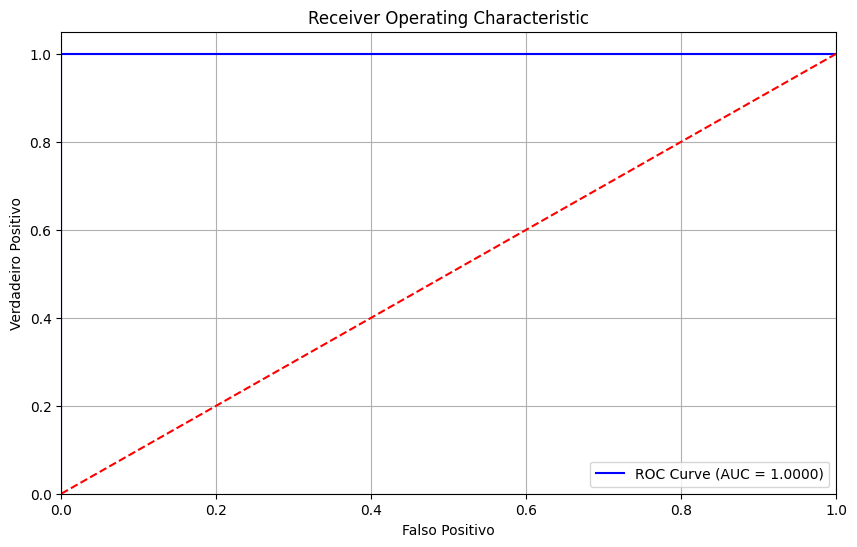

In [72]:
# Gráfico da curva ROC:                                                                 100% 0_0
fpr, tpr, thresholds = roc_curve(Y_teste, y_previsto)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()